In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('winequality-red.csv')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк данных:")
print(df.head())
missing_values = df.isnull().sum()
print("\nПропущенные значения:")
print(missing_values)

Размер датасета: (1599, 12)

Первые 5 строк данных:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4  

In [4]:
# Добавим атрибут "виноградная зрелость винограда" как отношение остаточного сахара к алкоголю
df['grape_maturity'] = df['residual sugar'] / df['alcohol']

# 3. Предобработка данных
print(f"\nДубликаты до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Размер после удаления дубликатов: {df.shape}")



Дубликаты до удаления: 0
Размер после удаления дубликатов: (1359, 13)


In [11]:
# Обработка выбросов с помощью Z-score
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
print(f"Размер после удаления выбросов: {df.shape}")

Размер после удаления выбросов: (1014, 13)


In [13]:
# Визуальный анализ данных и выявление кластеров
plt.figure(figsize=(15, 12))


<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

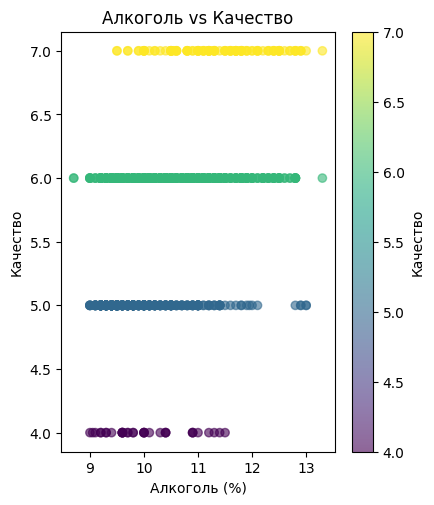

In [24]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 1)
plt.scatter(df['alcohol'], df['quality'], alpha=0.6, c=df['quality'], cmap='viridis')
plt.xlabel('Алкоголь (%)')
plt.ylabel('Качество')
plt.title('Алкоголь vs Качество')
plt.colorbar(label='Качество')

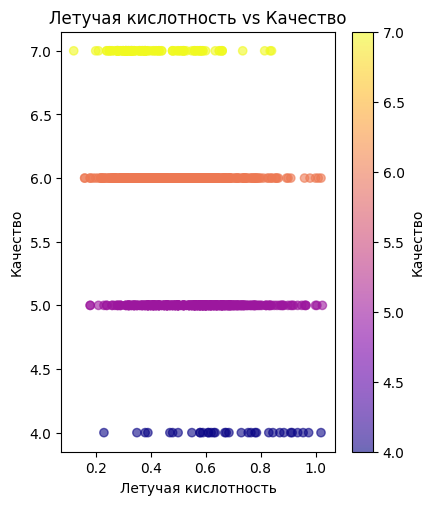

In [25]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 2)
plt.scatter(df['volatile acidity'], df['quality'], alpha=0.6, c=df['quality'], cmap='plasma')
plt.xlabel('Летучая кислотность')
plt.ylabel('Качество')
plt.title('Летучая кислотность vs Качество')
plt.colorbar(label='Качество')

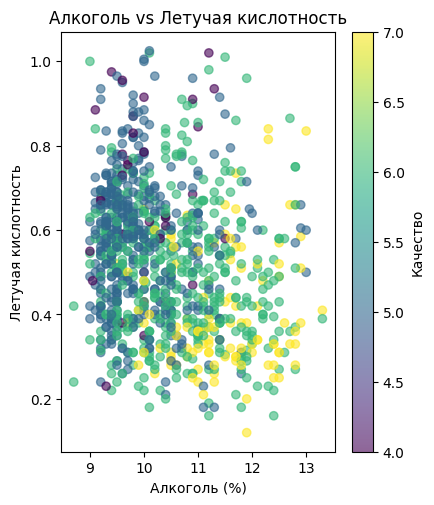

In [26]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 3)
plt.scatter(df['alcohol'], df['volatile acidity'], alpha=0.6, c=df['quality'], cmap='viridis')
plt.xlabel('Алкоголь (%)')
plt.ylabel('Летучая кислотность')
plt.title('Алкоголь vs Летучая кислотность')
plt.colorbar(label='Качество')

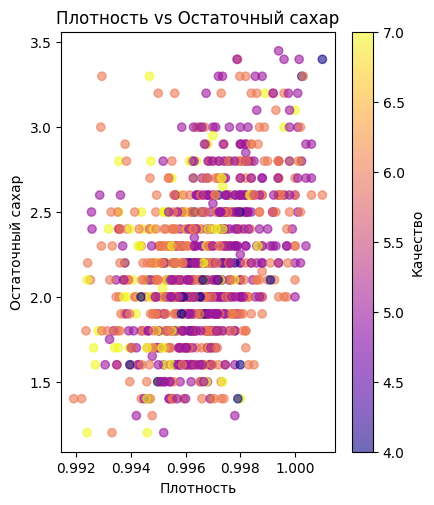

In [27]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 4)
plt.scatter(df['density'], df['residual sugar'], alpha=0.6, c=df['quality'], cmap='plasma')
plt.xlabel('Плотность')
plt.ylabel('Остаточный сахар')
plt.title('Плотность vs Остаточный сахар')
plt.colorbar(label='Качество')

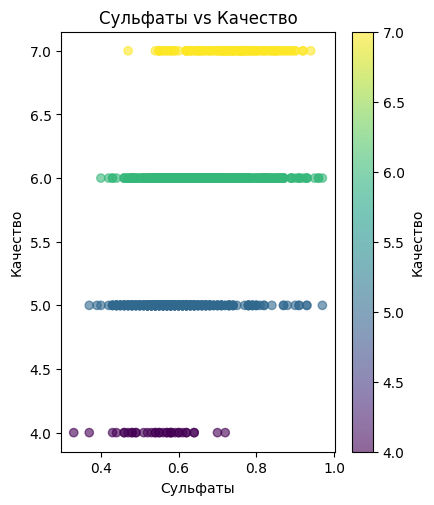

In [30]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 5)
plt.scatter(df['sulphates'], df['quality'], alpha=0.6, c=df['quality'], cmap='viridis')
plt.xlabel('Сульфаты')
plt.ylabel('Качество')
plt.title('Сульфаты vs Качество')
plt.colorbar(label='Качество')

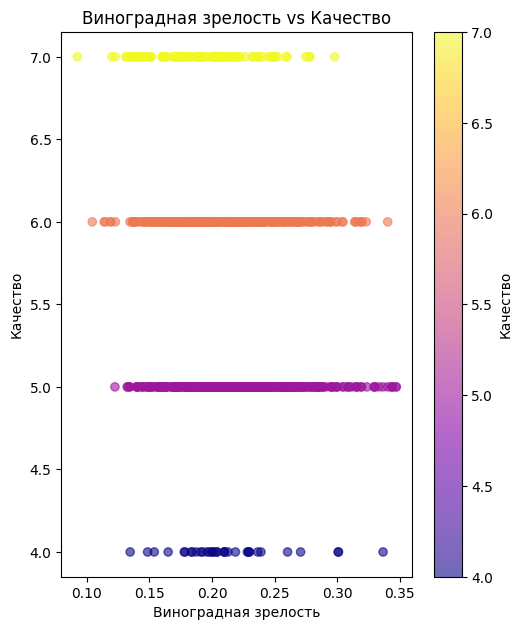

In [32]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 6)
plt.scatter(df['grape_maturity'], df['quality'], alpha=0.6, c=df['quality'], cmap='plasma')
plt.xlabel('Виноградная зрелость')
plt.ylabel('Качество')
plt.title('Виноградная зрелость vs Качество')
plt.colorbar(label='Качество')

plt.tight_layout()
plt.show()

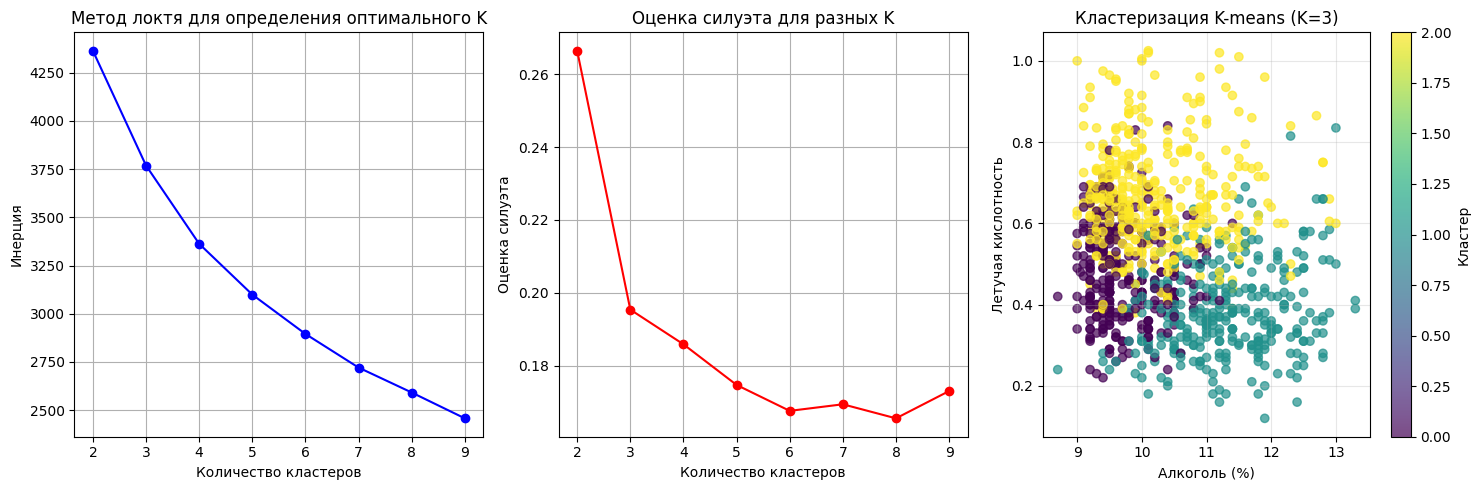

In [35]:
# Подготовка данных для кластеризации
# Выбираем наиболее значимые признаки для кластеризации
features_for_clustering = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality', 'grape_maturity']
X = df[features_for_clustering]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    

    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального K')
plt.grid(True)


plt.subplot(1, 3, 2)
plt.plot(range(2, 10), silhouette_scores, 'ro-')
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Оценка силуэта для разных K')
plt.grid(True)


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Визуализация кластеров
plt.subplot(1, 3, 3)
scatter = plt.scatter(df['alcohol'], df['volatile acidity'], c=df['cluster'], 
                    cmap='viridis', alpha=0.7)
plt.xlabel('Алкоголь (%)')
plt.ylabel('Летучая кислотность')
plt.title(f'Кластеризация K-means (K={optimal_k})')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
print("\nХарактеристики кластеров:")
cluster_summary = df.groupby('cluster')[features_for_clustering].mean()
print(cluster_summary)

# Визуализация характеристик кластеров
plt.figure(figsize=(15, 10))


Характеристики кластеров:
           alcohol  volatile acidity  sulphates  citric acid   quality  \
cluster                                                                  
0         9.724074          0.477694   0.597778     0.326936  5.329966   
1        11.304521          0.385882   0.723268     0.383627  6.254902   
2        10.180576          0.660012   0.585328     0.097591  5.362530   

         grape_maturity  
cluster                  
0              0.246704  
1              0.191205  
2              0.201159  


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

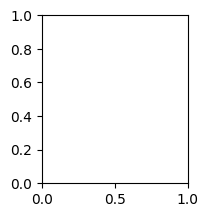

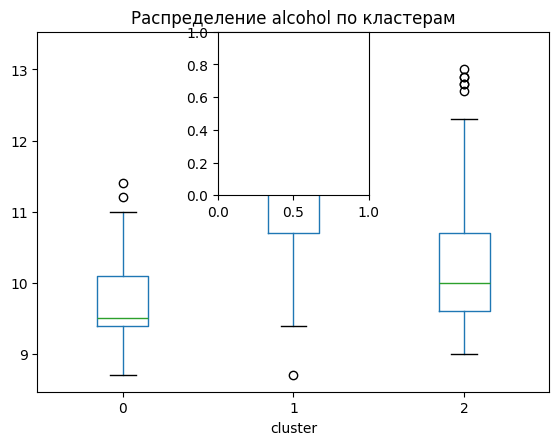

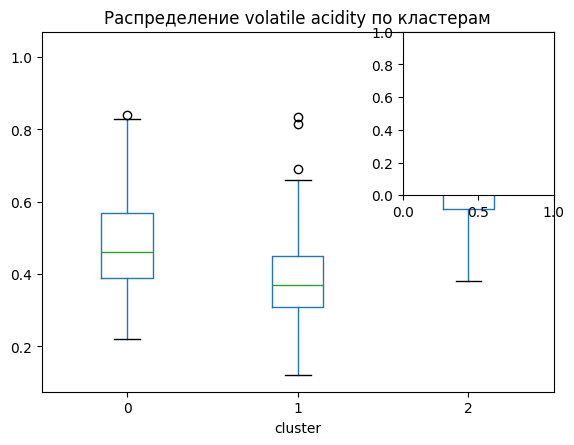

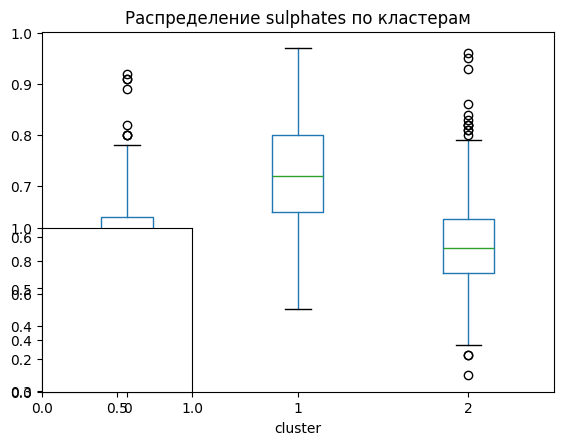

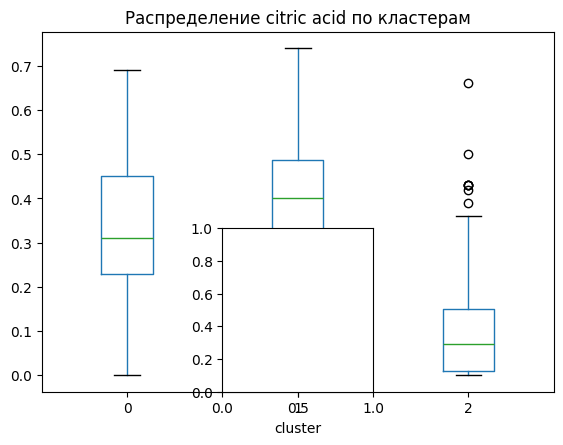

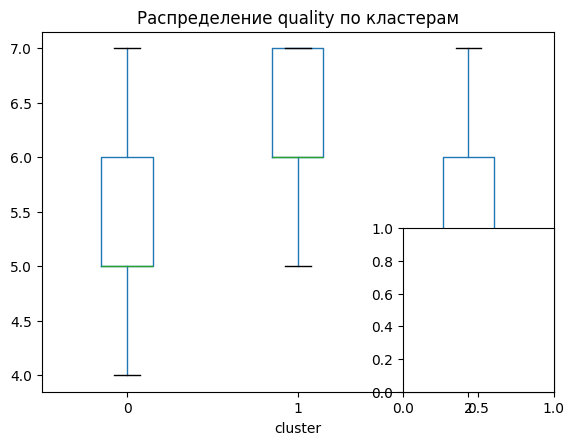

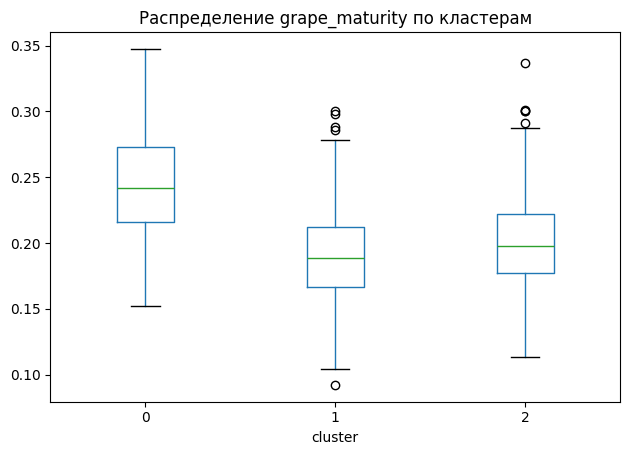

In [40]:
for i, feature in enumerate(features_for_clustering, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=feature, by='cluster', grid=False)
    plt.title(f'Распределение {feature} по кластерам')
    plt.suptitle('')  # Убираем автоматический заголовок

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

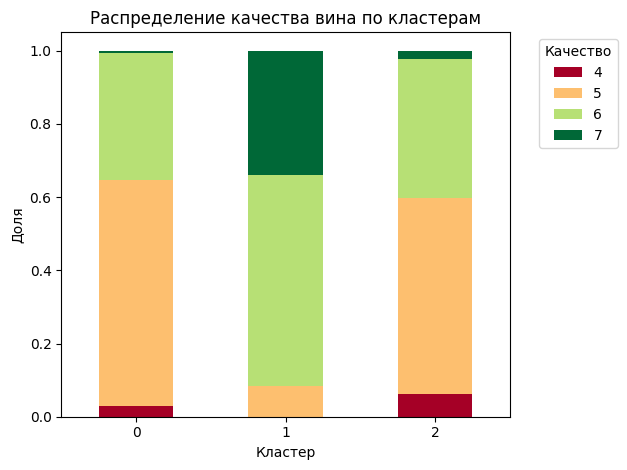

In [41]:
plt.figure(figsize=(10, 6))
quality_by_cluster = df.groupby('cluster')['quality'].value_counts(normalize=True).unstack()
quality_by_cluster.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Распределение качества вина по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Качество', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

ВЫВОДЫ И ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ

ВЫВОД:
Кластеризация подтвердила известные закономерности: алкоголь положительно коррелирует с качеством, а летучая кислотность - отрицательно

ИНТЕРПРЕТАЦИЯ:

Кластер 0: Вина среднего качества с умеренными характеристиками

Кластер 1: Высококачественные вина с высоким содержанием алкоголя и низкой кислотностью

Кластер 2: Низкокачественные вина с высокой кислотностью и низким содержанием алкоголя